# Exploratory Data Analysis for Bike Sharing Rentals 

**Importing all the libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import seaborn as sns
import cufflinks as cf
import plotly.graph_objs as go
import missingno as msno
import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from datetime import datetime as dt
import calendar as cal

init_notebook_mode(connected=True)
cf.go_offline()

from IPython.core.display import HTML
%matplotlib inline

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


**Importing Training and Testing Datasets from S3 bucket**

In [3]:
df = pd.read_csv('https://s3.us-east-2.amazonaws.com/final-project-dataset/train.csv', low_memory=False)
df_test = pd.read_csv('https://s3.us-east-2.amazonaws.com/final-project-dataset/test.csv', low_memory=False)

**Combining the two datasets for data analysis of independent variables**

In [20]:
df_combined = df.append(df_test,sort=True)

In [21]:
df_combined.count()

atemp         17379
casual        10886
count         10886
datetime      17379
holiday       17379
humidity      17379
registered    10886
season        17379
temp          17379
weather       17379
windspeed     17379
workingday    17379
dtype: int64

**Exploring the Training Dataset**

In [22]:
df.describe()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count  
count  10886.000000  
mean     191.574132  
std      181.144454  
min        1.000000  
25%       42.000000  
50%      145.000000  
75%      284.000000  
max      977.000000

In [23]:
df.head(4).transpose()

0                    1                    2  \
datetime    2011-01-01 00:00:00  2011-01-01 01:00:00  2011-01-01 02:00:00   
season                        1                    1                    1   
holiday                       0                    0                    0   
workingday                    0                    0                    0   
weather                       1                    1                    1   
temp                       9.84                 9.02                 9.02   
atemp                    14.395               13.635               13.635   
humidity                     81                   80                   80   
windspeed                     0                    0                    0   
casual                        3                    8                    5   
registered                   13                   32                   27   
count                        16                   40                   32   

                              3  
datetime    2011-01-01 03:00:00  
season                        1  
holiday                       0  
workingday                    0  
weather                       1  
temp                       9.84  
atemp                    14.395  
humidity                     75  
windspeed                     0  
casual                        3  
registered                   10  
count                        13

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [25]:
df.count()

datetime      10886
season        10886
holiday       10886
workingday    10886
weather       10886
temp          10886
atemp         10886
humidity      10886
windspeed     10886
casual        10886
registered    10886
count         10886
dtype: int64

In [26]:
df_test.count()

datetime      6493
season        6493
holiday       6493
workingday    6493
weather       6493
temp          6493
atemp         6493
humidity      6493
windspeed     6493
dtype: int64

**Checking if there is any missing data**

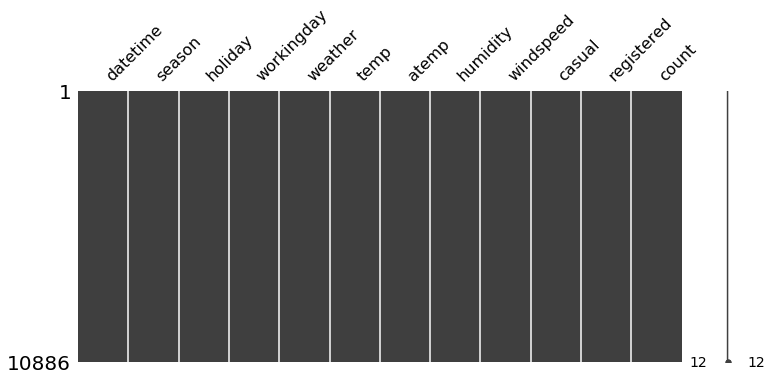

In [27]:
msno.matrix(df,figsize=(12,5))

**Correlation Matrix**

In [28]:
df.corr()

season   holiday  workingday   weather      temp     atemp  \
season      1.000000  0.029368   -0.008126  0.008879  0.258689  0.264744   
holiday     0.029368  1.000000   -0.250491 -0.007074  0.000295 -0.005215   
workingday -0.008126 -0.250491    1.000000  0.033772  0.029966  0.024660   
weather     0.008879 -0.007074    0.033772  1.000000 -0.055035 -0.055376   
temp        0.258689  0.000295    0.029966 -0.055035  1.000000  0.984948   
atemp       0.264744 -0.005215    0.024660 -0.055376  0.984948  1.000000   
humidity    0.190610  0.001929   -0.010880  0.406244 -0.064949 -0.043536   
windspeed  -0.147121  0.008409    0.013373  0.007261 -0.017852 -0.057473   
casual      0.096758  0.043799   -0.319111 -0.135918  0.467097  0.462067   
registered  0.164011 -0.020956    0.119460 -0.109340  0.318571  0.314635   
count       0.163439 -0.005393    0.011594 -0.128655  0.394454  0.389784   

            humidity  windspeed    casual  registered     count  
season      0.190610  -0.147121  0.096758    0.164011  0.163439  
holiday     0.001929   0.008409  0.043799   -0.020956 -0.005393  
workingday -0.010880   0.013373 -0.319111    0.119460  0.011594  
weather     0.406244   0.007261 -0.135918   -0.109340 -0.128655  
temp       -0.064949  -0.017852  0.467097    0.318571  0.394454  
atemp      -0.043536  -0.057473  0.462067    0.314635  0.389784  
humidity    1.000000  -0.318607 -0.348187   -0.265458 -0.317371  
windspeed  -0.318607   1.000000  0.092276    0.091052  0.101369  
casual     -0.348187   0.092276  1.000000    0.497250  0.690414  
registered -0.265458   0.091052  0.497250    1.000000  0.970948  
count      -0.317371   0.101369  0.690414    0.970948  1.000000

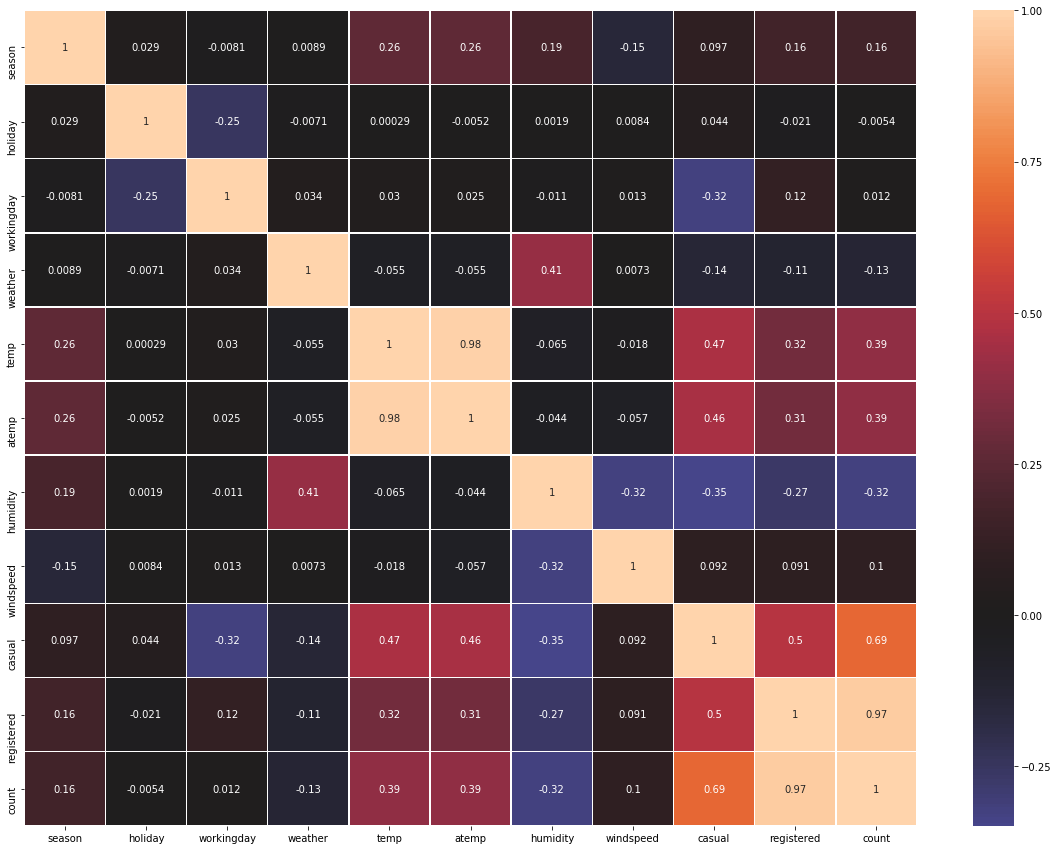

In [29]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, center=0)

*It is obvious that casual and registered are correlated since count is erived from count*  
*Temperature and Feels like Temperature are slighlty correlated with count*  
*We can remove either Temperature or Feels like Temperature as both are interdependent with same correlation*   
*Humidity is negatively correlated to bike rentals, which mean as humidity inncreases the rental counts decreases, same goes for Holiday*

**Distribution of variables using Count**

In [30]:
cols = list(df.columns)

for col in cols :
    if col not in ['datetime']:
        df[col].iplot(kind='hist',xTitle=col,yTitle='Counts')

*There are less holidays in the training data*  
*More working days are present in the dataset with respect to holidays and weekends*  
*The count of 'Heavy Rain' is absent in the data, while the count of 'Clear' weather is the highest*  
*Temperature and Feels like Temperature is Normally Distributed*  
*Humidity is skewed towards right, and for 22 entries the humidity is zero*  
*There are arounf 1313 entries with zero value for Windspeed*  
*Total Rental counts is skewed towards left with majority data points having zero count*  


## Lets consider each variables  
## Count

C:\Users\Anuja\Anaconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



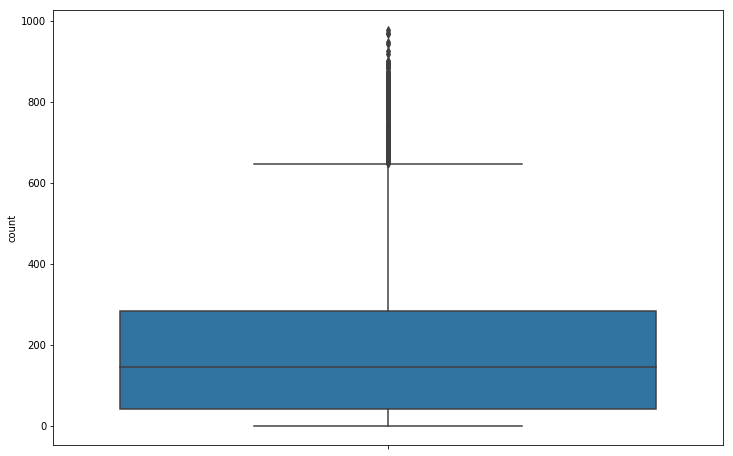

In [31]:
plt.figure(figsize=(12,8))
sns.boxplot(y='count', data=df)

*There are some outliers having value more than 600, lets remove those values and check the distribution*

C:\Users\Anuja\Anaconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



(10474, 12)

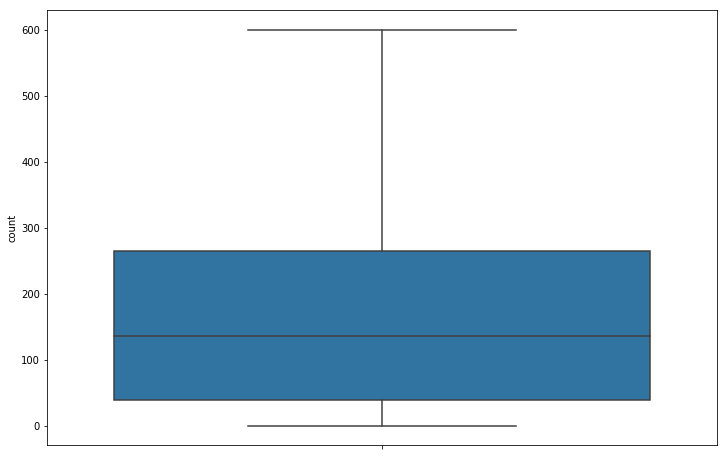

In [32]:
countWithoutOutliers =  df.drop(df.index[np.where(df['count'] > 600)])
plt.figure(figsize=(12,8))
sns.boxplot(y='count', data=countWithoutOutliers)
countWithoutOutliers.shape

*The mean has not changed,  and the total  count of the data reduced from 10886 to 10474 which is around 400 datapoints*

## Casual and Registered

In [33]:
cols = ['casual','registered']

for col in cols :
    df.groupby('season').max()[col].iplot(
    yTitle='Rental Count',
    xTitle='Season',
    title='Season Wise Maximum '+col+ ' Bikes',
    colors='Red',
    mode='lines+markers')

*The maximum counts of Registered Bikers are more in the FAll Season while it is least for the Casual Bikers*

In [34]:
df.groupby('season').max()[['registered','casual']].iplot(
    yTitle='Number of Casual VS Registered Bikers',
    xTitle='Season',
    title='Season Wise Casual VS Registered Maximum Bike Rentals',
    mode='lines+markers')

*Lets drop Casual and Registerd Bikers and visualize the data as Count is nothing but the summation of both*

In [35]:
df.drop(['casual','registered'],axis = 1 ,inplace = True)
df.head().transpose()

0                    1                    2  \
datetime    2011-01-01 00:00:00  2011-01-01 01:00:00  2011-01-01 02:00:00   
season                        1                    1                    1   
holiday                       0                    0                    0   
workingday                    0                    0                    0   
weather                       1                    1                    1   
temp                       9.84                 9.02                 9.02   
atemp                    14.395               13.635               13.635   
humidity                     81                   80                   80   
windspeed                     0                    0                    0   
count                        16                   40                   32   

                              3                    4  
datetime    2011-01-01 03:00:00  2011-01-01 04:00:00  
season                        1                    1  
holiday                       0                    0  
workingday                    0                    0  
weather                       1                    1  
temp                       9.84                 9.84  
atemp                    14.395               14.395  
humidity                     75                   75  
windspeed                     0                    0  
count                        13                    1

## Adding new features to explore the hourly data

In [36]:
df['datetime'] = pd.to_datetime(df.datetime)
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['quarter'] = df['datetime'].dt.quarter
df['weekNumberInYear'] = df['datetime'].dt.week
df['dayInWeek'] = df['datetime'].dt.dayofweek.apply(lambda x : cal.day_name[x])
df['hourOfDay'] = df['datetime'].dt.hour
df.head().transpose()

0                    1  \
datetime          2011-01-01 00:00:00  2011-01-01 01:00:00   
season                              1                    1   
holiday                             0                    0   
workingday                          0                    0   
weather                             1                    1   
temp                             9.84                 9.02   
atemp                          14.395               13.635   
humidity                           81                   80   
windspeed                           0                    0   
count                              16                   40   
year                             2011                 2011   
month                               1                    1   
quarter                             1                    1   
weekNumberInYear                   52                   52   
dayInWeek                    Saturday             Saturday   
hourOfDay                           0                    1   

                                    2                    3  \
datetime          2011-01-01 02:00:00  2011-01-01 03:00:00   
season                              1                    1   
holiday                             0                    0   
workingday                          0                    0   
weather                             1                    1   
temp                             9.02                 9.84   
atemp                          13.635               14.395   
humidity                           80                   75   
windspeed                           0                    0   
count                              32                   13   
year                             2011                 2011   
month                               1                    1   
quarter                             1                    1   
weekNumberInYear                   52                   52   
dayInWeek                    Saturday             Saturday   
hourOfDay                           2                    3   

                                    4  
datetime          2011-01-01 04:00:00  
season                              1  
holiday                             0  
workingday                          0  
weather                             1  
temp                             9.84  
atemp                          14.395  
humidity                           75  
windspeed                           0  
count                               1  
year                             2011  
month                               1  
quarter                             1  
weekNumberInYear                   52  
dayInWeek                    Saturday  
hourOfDay                           4

## Correlation Matrix after removing Casual and Registered Bikers and adding new variables

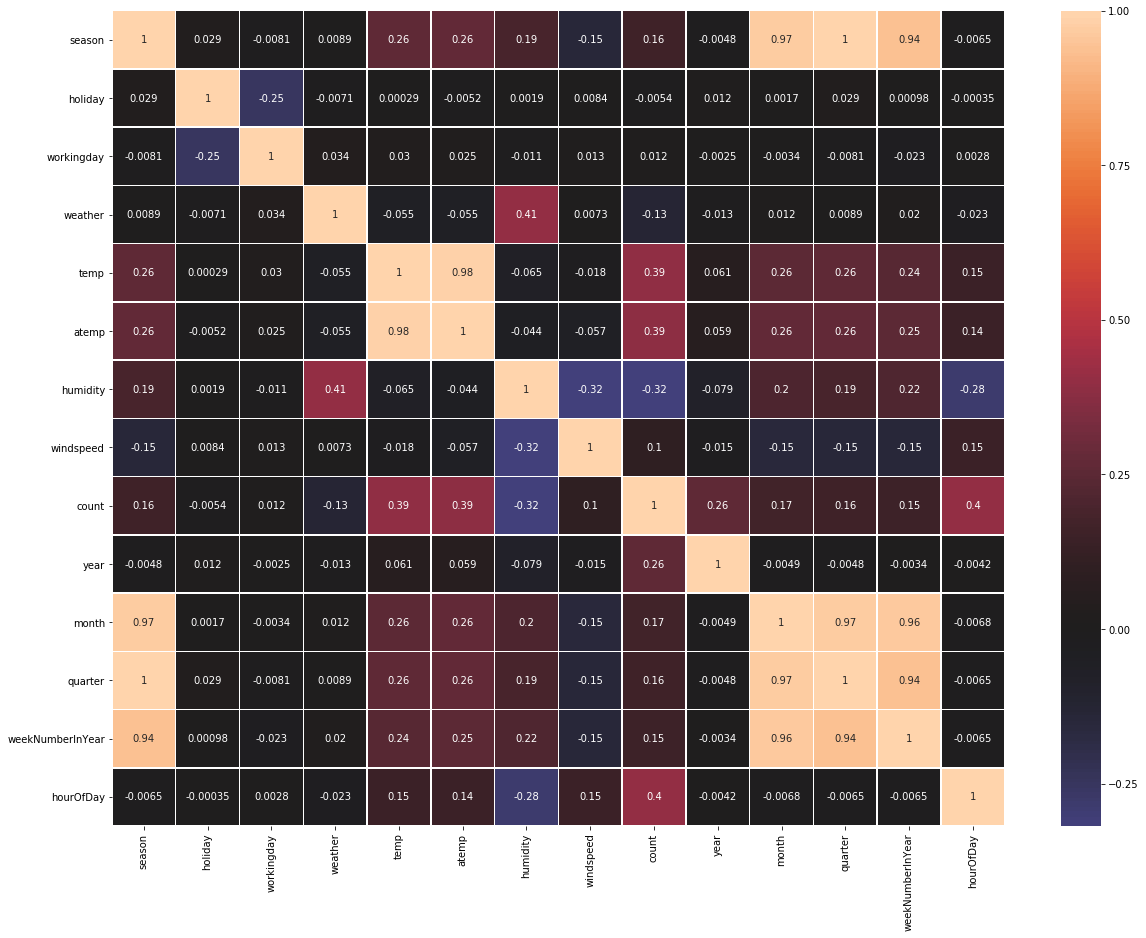

In [37]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, center=0)

*Hour of the day is moderately correlated to the bike rentals*   
*Year, month quarter and week numbers are positively correlated to the bike rentals*  


## Weekly Bike Rentals with repect to Season

C:\Users\Anuja\Anaconda3\lib\site-packages\seaborn\categorical.py:490: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



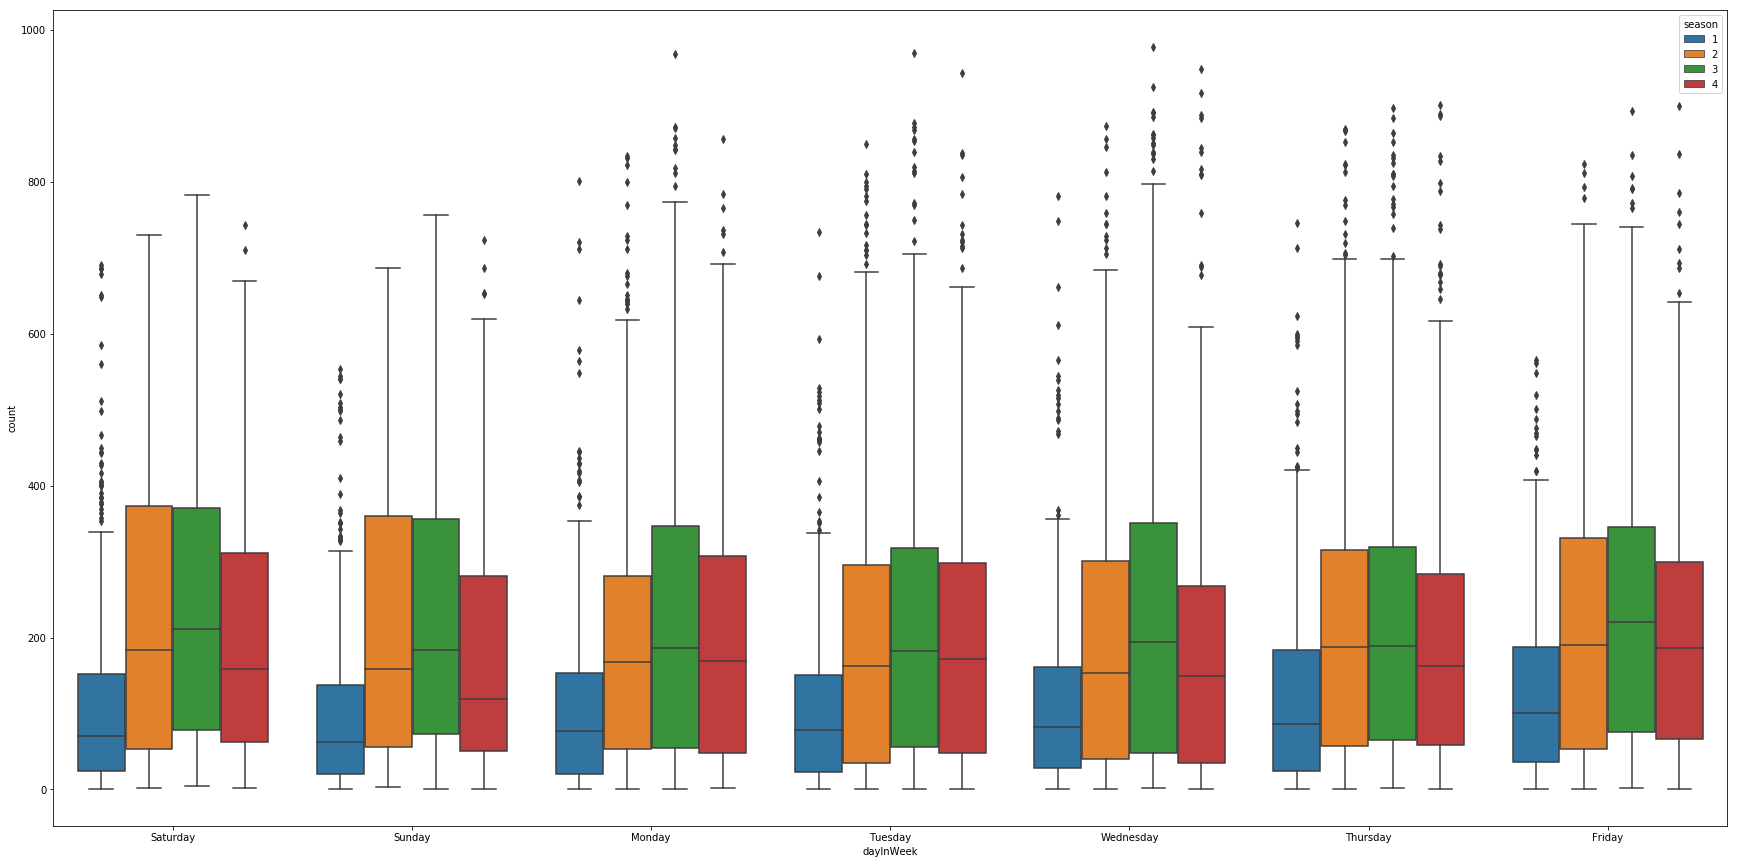

In [38]:
plt.figure(figsize=(30,15))
sns.boxplot('dayInWeek','count', data=df, hue = 'season')

*It can be inferred that for Summer and Fall Seasons the mean rental  count is always greater,  least for Spring season*  
*Fall always been the highest with mean rental count weekly*  
*There are no outliers for Weekends inn the Summer and Fall Season*  

## Hourly Bike Rentals with repect to Season

C:\Users\Anuja\Anaconda3\lib\site-packages\seaborn\categorical.py:490: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



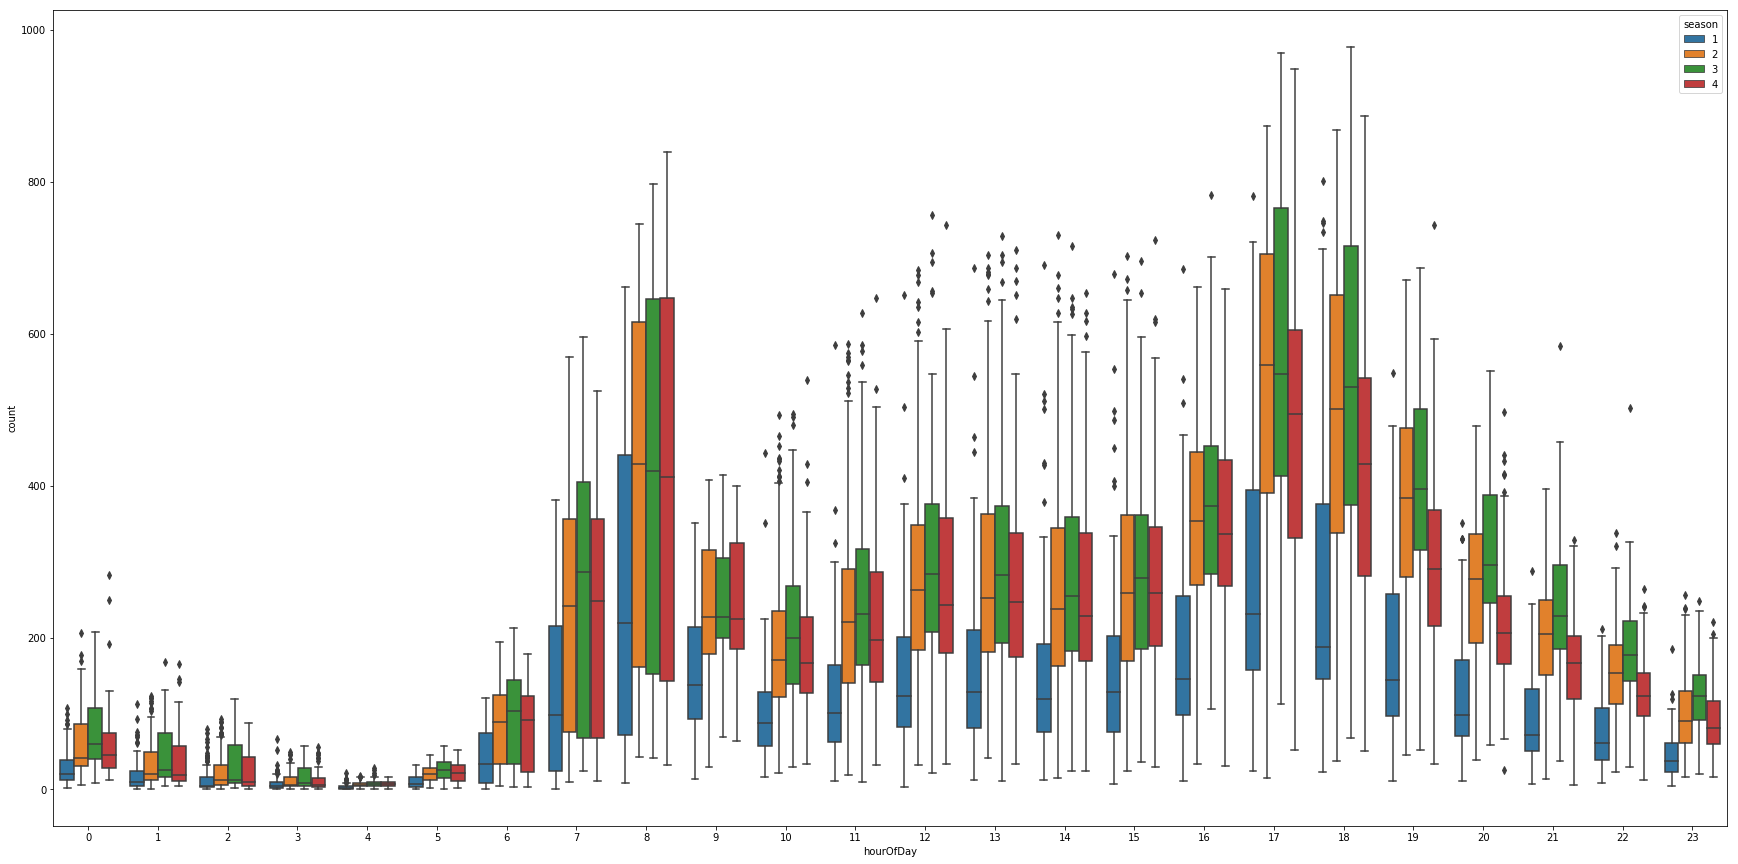

In [39]:
plt.figure(figsize=(30,15))
sns.boxplot('hourOfDay','count', data=df, hue = 'season')

*For all dour seasons the mean rental count was highest between 7am and 8am $ 5pm and 6pm*   
*It can be inferred that most of the bikers are using bikes for travelling during office hours, hence more office going people*  
*For Winter again the count was low*   

## Relation between hour of the day and count of rentals is slightly linear

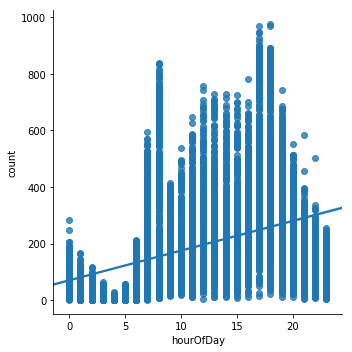

In [23]:
sns.lmplot('hourOfDay','count', data=df)

## Lets map the numeric values of Season to real categorical values 

In [45]:
df["season"] = df.season.map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })

## Bike Rental Distribution with repect to Year

C:\Users\Anuja\Anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



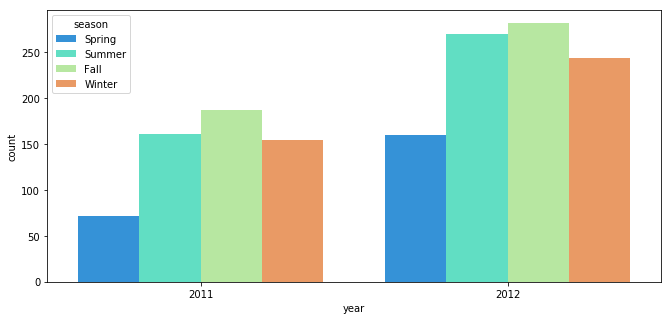

In [25]:
plt.figure(figsize=(11,5))
sns.barplot('year','count',hue='season', data=df,palette='rainbow', ci=None)

*The total Rental count increases with the year*

## Bike Rental Distribution with repect to Season, Month, Week and 

C:\Users\Anuja\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



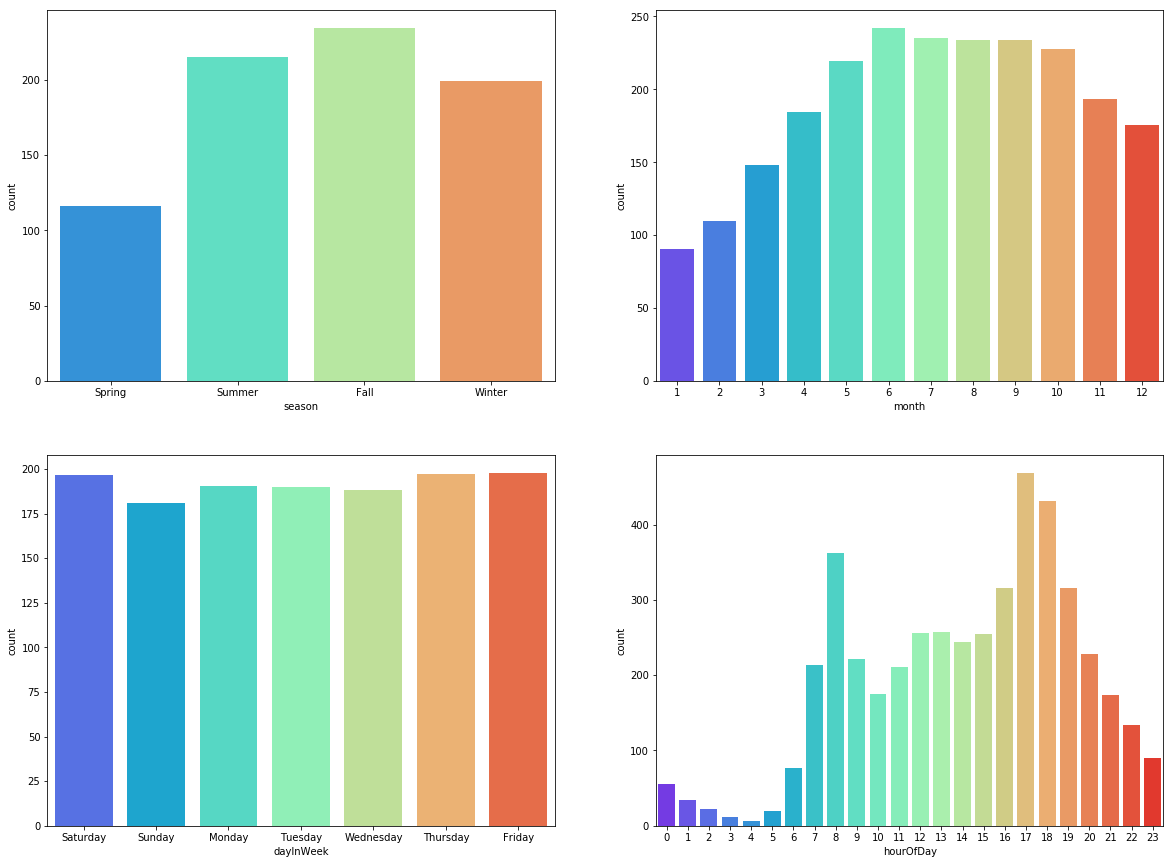

In [47]:
fig,axes = plt.subplots(ncols=2,nrows=2)
fig.set_size_inches(20, 15)
sns.barplot('season', 'count',data=df,palette='rainbow', ci=None,ax=axes[0][0])
sns.barplot('month', 'count',data=df,palette='rainbow', ci=None, ax=axes[0][1])
sns.barplot('dayInWeek', 'count',data=df,palette='rainbow', ci=None,ax=axes[1][0] )
sns.barplot('hourOfDay', 'count',data=df,palette='rainbow', ci=None,ax=axes[1][1] )

*Average Rental Count is least for Sundays*  
*Between 5pm and 6pm the average count is the highest *  
*Summer and Fall has the highest count*

## Bike Rental Maximum count with repect to Season, Month, Week and Hour

In [46]:
df.groupby('season').max()['count'].iplot(
    yTitle='Bike Rentals',
    xTitle='Season',
    title='Season Wise Maximum Bike Rentals',
    colors='Red',
    mode='lines+markers')

df.groupby('month').max()['count'].iplot(
    yTitle='Bike Rentals',
    xTitle='Month',
    title='Month Wise Maximum Bike Rental',
    colors='Red',
    mode='lines+markers')

df.groupby('dayInWeek').max()['count'].iplot(
    yTitle='Bike Rentals',
    xTitle='Week',
    title='Week Wise Maximum Bike Rental',
    colors='Red',
    mode='lines+markers')

df.groupby('hourOfDay').max()['count'].iplot(
    yTitle='Bike Rentals',
    xTitle='Hour',
    title='Hour Wise Maximum Bike Rental',
    colors='Red',
    mode='lines+markers')

*977 was the highest count for Fall in the month of September and 801 for Spring which is the least*  
*Monday Tuesday Wednesday marked the highest count*  

## Trend Analysis

C:\Users\Anuja\Anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



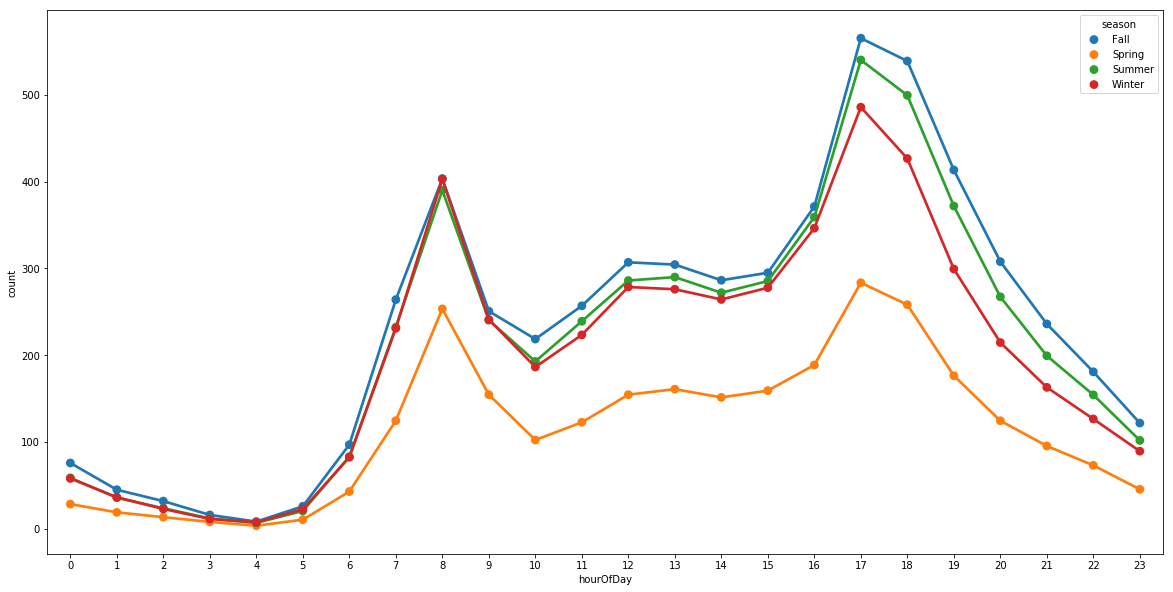

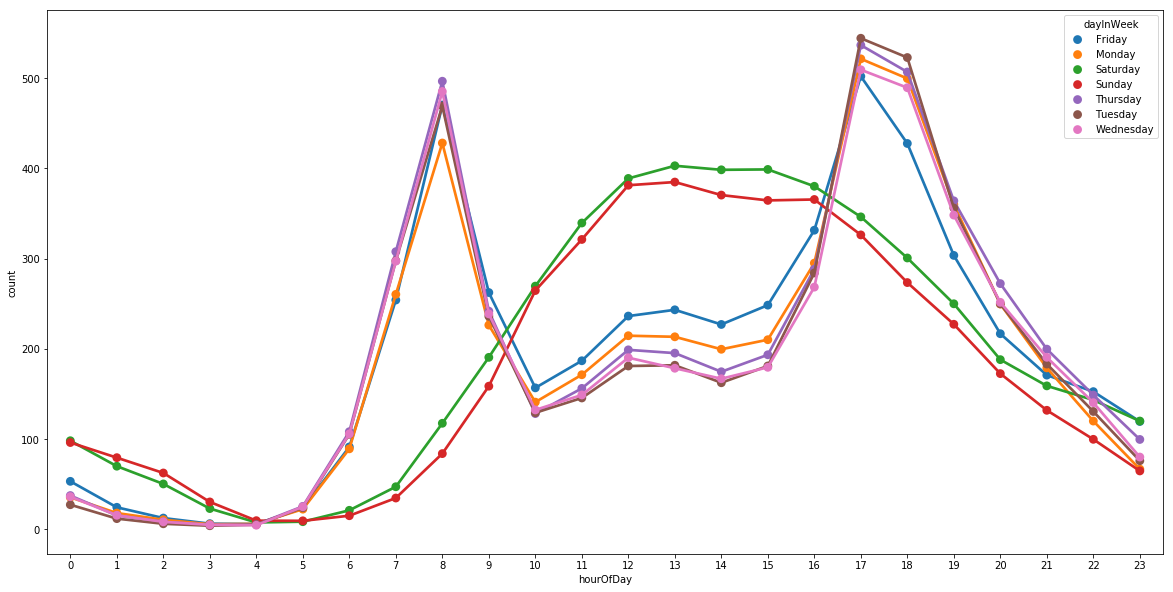

In [30]:
plt.figure(figsize=(20,10))
seasonWise = pd.DataFrame(df.groupby(["hourOfDay","season"],sort=True)["count"].mean()).reset_index()
sns.pointplot(x=seasonWise["hourOfDay"], y=seasonWise["count"],hue=seasonWise["season"],
             data=seasonWise, join=True)

plt.figure(figsize=(20,10))
weekWise = pd.DataFrame(df.groupby(["hourOfDay","dayInWeek"],sort=True)["count"].mean()).reset_index()
sns.pointplot(x=weekWise["hourOfDay"], y=weekWise["count"],hue=weekWise["dayInWeek"],
             data=weekWise, join=True)

*The mean count for Fall has been highest while Spring been the least*  
*A new obeservation is that even though the mean is low for the weekdays from 9am to 4pm, it is higher for Weekends*  

## Temperature

In [31]:
df.groupby('hourOfDay').min()[['temp','count']].iplot(
    yTitle='Mimimum Bike Rentals Count VS Temperature',
    xTitle='Hour',
    title='Hour Wise Bike Rentals Count VS Temperature',
    mode='lines+markers')

*Hourly trend has been the same even though the temperature changes*  

C:\Users\Anuja\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



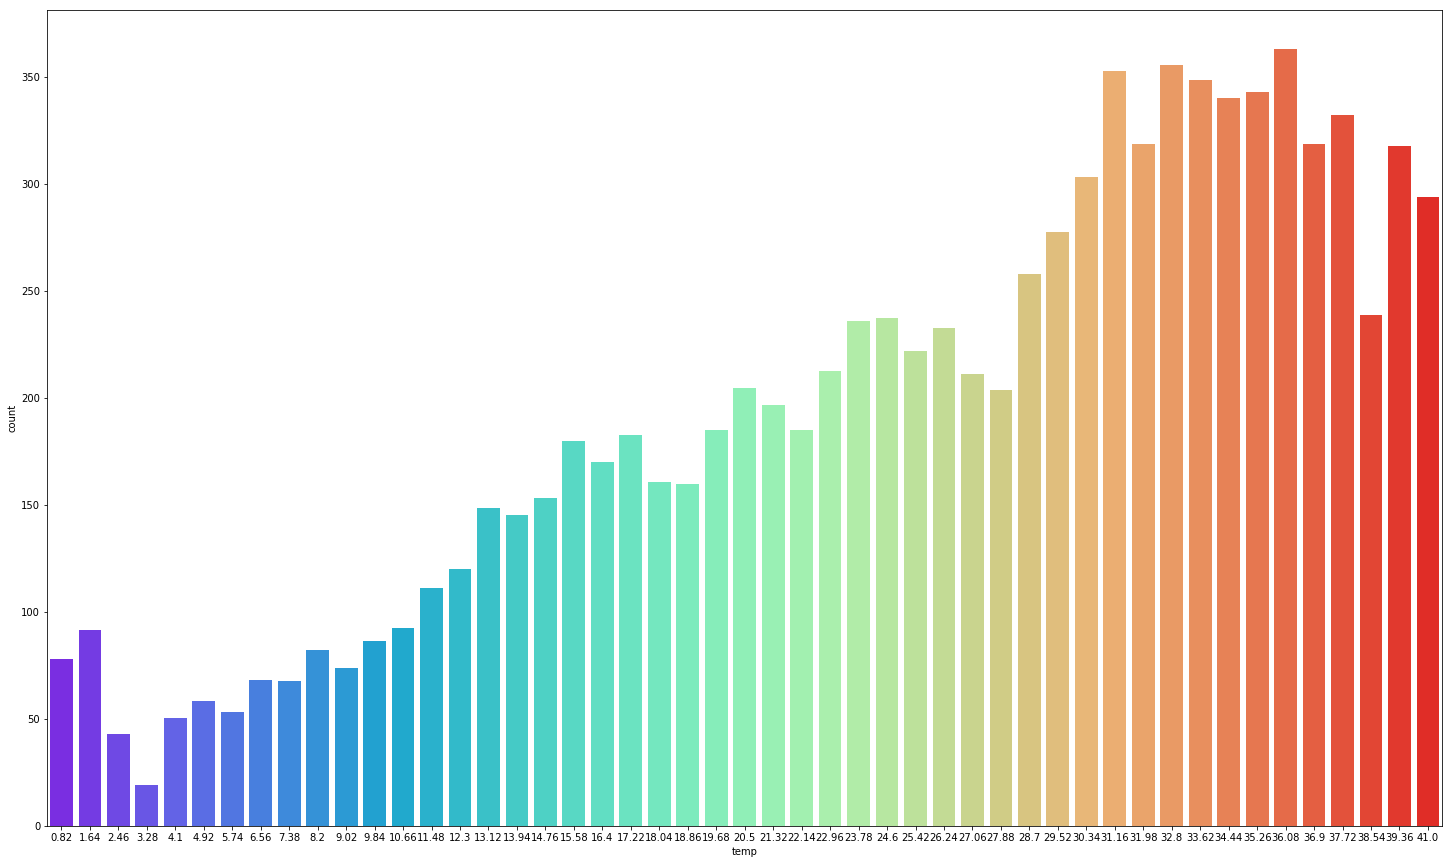

In [32]:
plt.figure(figsize=(25,15))
sns.barplot('temp', 'count',data=df,palette='rainbow', ci=None)

*As the temperature increase the mean bike rental count increase*  

C:\Users\Anuja\Anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



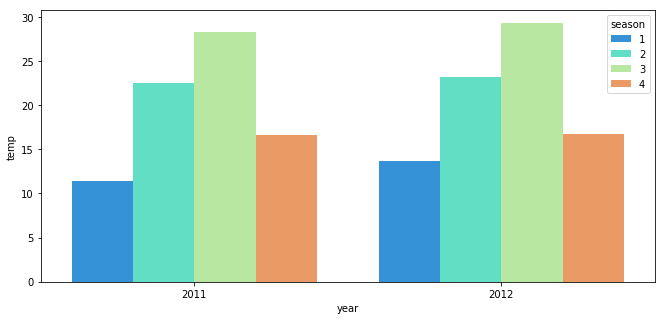

In [42]:
plt.figure(figsize=(11,5))
sns.barplot('year','temp',hue='season', data=df,palette='rainbow', ci=None)

*Temperature has been the almost the same for both the years*  

C:\Users\Anuja\Anaconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



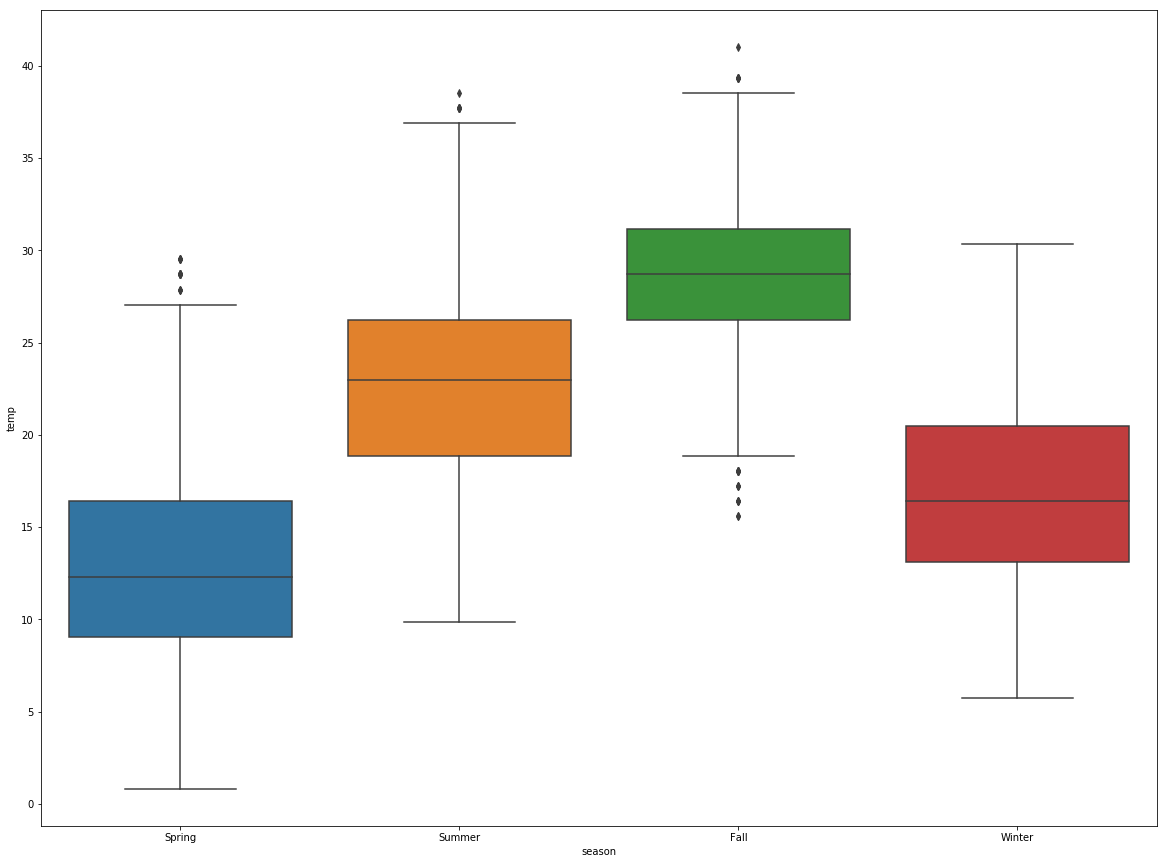

In [33]:
plt.figure(figsize=(20,15))
sns.boxplot('season','temp', data=df)

*Even though the temperature is the highest for Fall, there are outliers with low temperature* 

# Temperature Distribution with repect to Season, Month, Week and Hour

C:\Users\Anuja\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



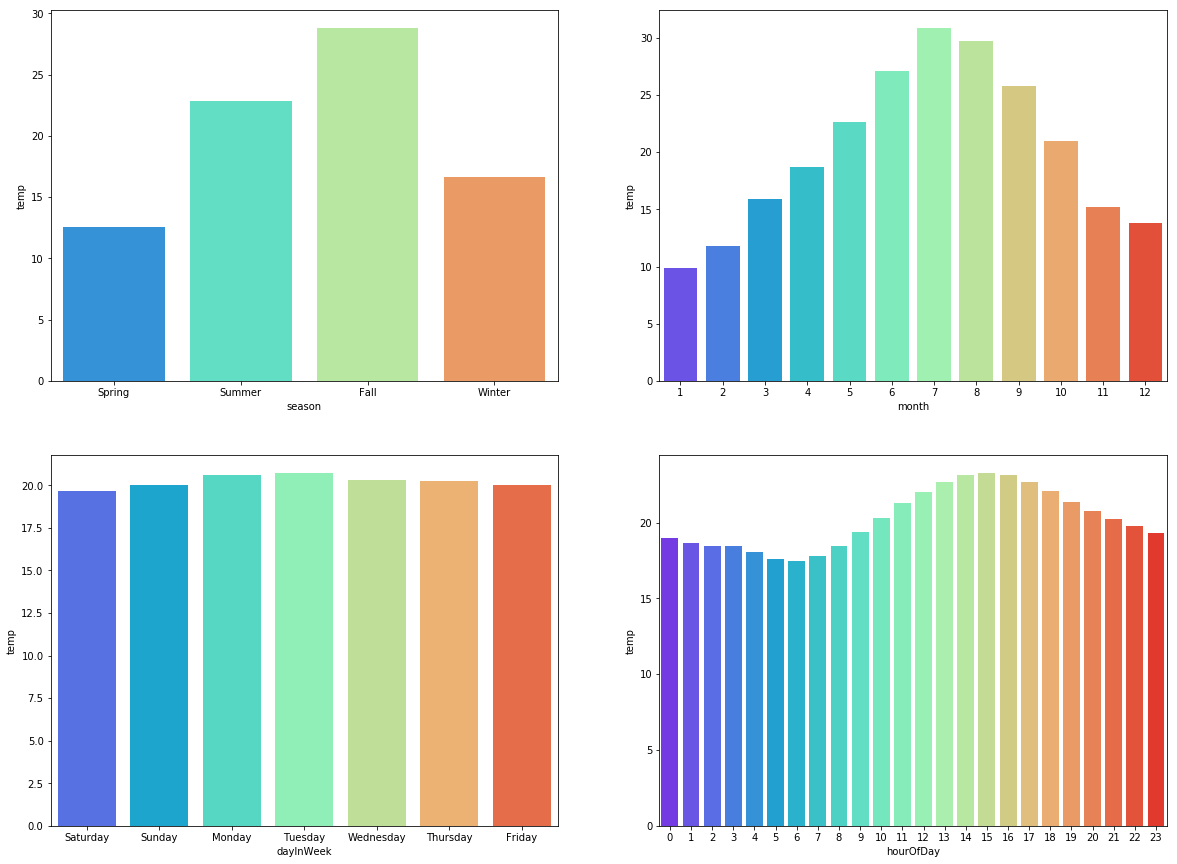

In [34]:
fig,axes = plt.subplots(ncols=2,nrows=2)
fig.set_size_inches(20, 15)
sns.barplot('season', 'temp',data=df,palette='rainbow', ci=None,ax=axes[0][0])
sns.barplot('month', 'temp',data=df,palette='rainbow', ci=None, ax=axes[0][1])
sns.barplot('dayInWeek', 'temp',data=df,palette='rainbow', ci=None,ax=axes[1][0])
sns.barplot('hourOfDay', 'temp',data=df,palette='rainbow', ci=None,ax=axes[1][1])

*Monthly the temperature data is normally distributed*  
*Hourly the temperature increases from 7am and decreases after 4pm*    

## Maximum temperature with repect to Season, Month, Week and Hour

In [49]:
df.groupby('season').mean()['temp'].iplot(
    yTitle='Bike Rentals',
    xTitle='Season',
    title='Season Wise Maximum Bike Rentals',
    colors='Red',
    mode='lines+markers')

df.groupby('month').mean()['temp'].iplot(
    yTitle='Bike Rentals',
    xTitle='Month',
    title='Month Wise Maximum Bike Rental',
    colors='Red',
    mode='lines+markers')

df.groupby('dayInWeek').mean()['temp'].iplot(
    yTitle='Bike Rentals',
    xTitle='Week',
    title='Week Wise Maximum Bike Rental',
    colors='Red',
    mode='lines+markers')

df.groupby('hourOfDay').mean()['temp'].iplot(
    yTitle='Bike Rentals',
    xTitle='Hour',
    title='Hour Wise Maximum Bike Rental',
    colors='Red',
    mode='lines+markers')

*28 was the highest mean vaue of temperature for Fall and 30 for the month of July*  
*Monday and Tuesday marked the highest count* 

## Comapring  Temperature with Feels Like Temperature

In [36]:
df.groupby('season').mean()[['temp','atemp']].iplot(
    yTitle='Bike Rentals',
    xTitle='Season',
    title='Season Wise Maximum Bike Rentals',
    mode='lines+markers')

df.groupby('month').mean()[['temp','atemp']].iplot(
    yTitle='Bike Rentals',
    xTitle='Month',
    title='Month Wise Maximum Bike Rental',
    mode='lines+markers')

df.groupby('hourOfDay').mean()[['temp','atemp']].iplot(
    yTitle='Bike Rentals',
    xTitle='Hour',
    title='Hour Wise Maximum Bike Rental',
    mode='lines+markers')

*Both behaves in similar manner with a mean difference of 3*

## Lets categorize the weather data 

In [50]:
df["weather"] = df.weather.map({1: "Clear",\
                                        2 : "Mist", \
                                        3 : "Light Snow", \
                                        4 : "Heavy Rain" })

## Weather

C:\Users\Anuja\Anaconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



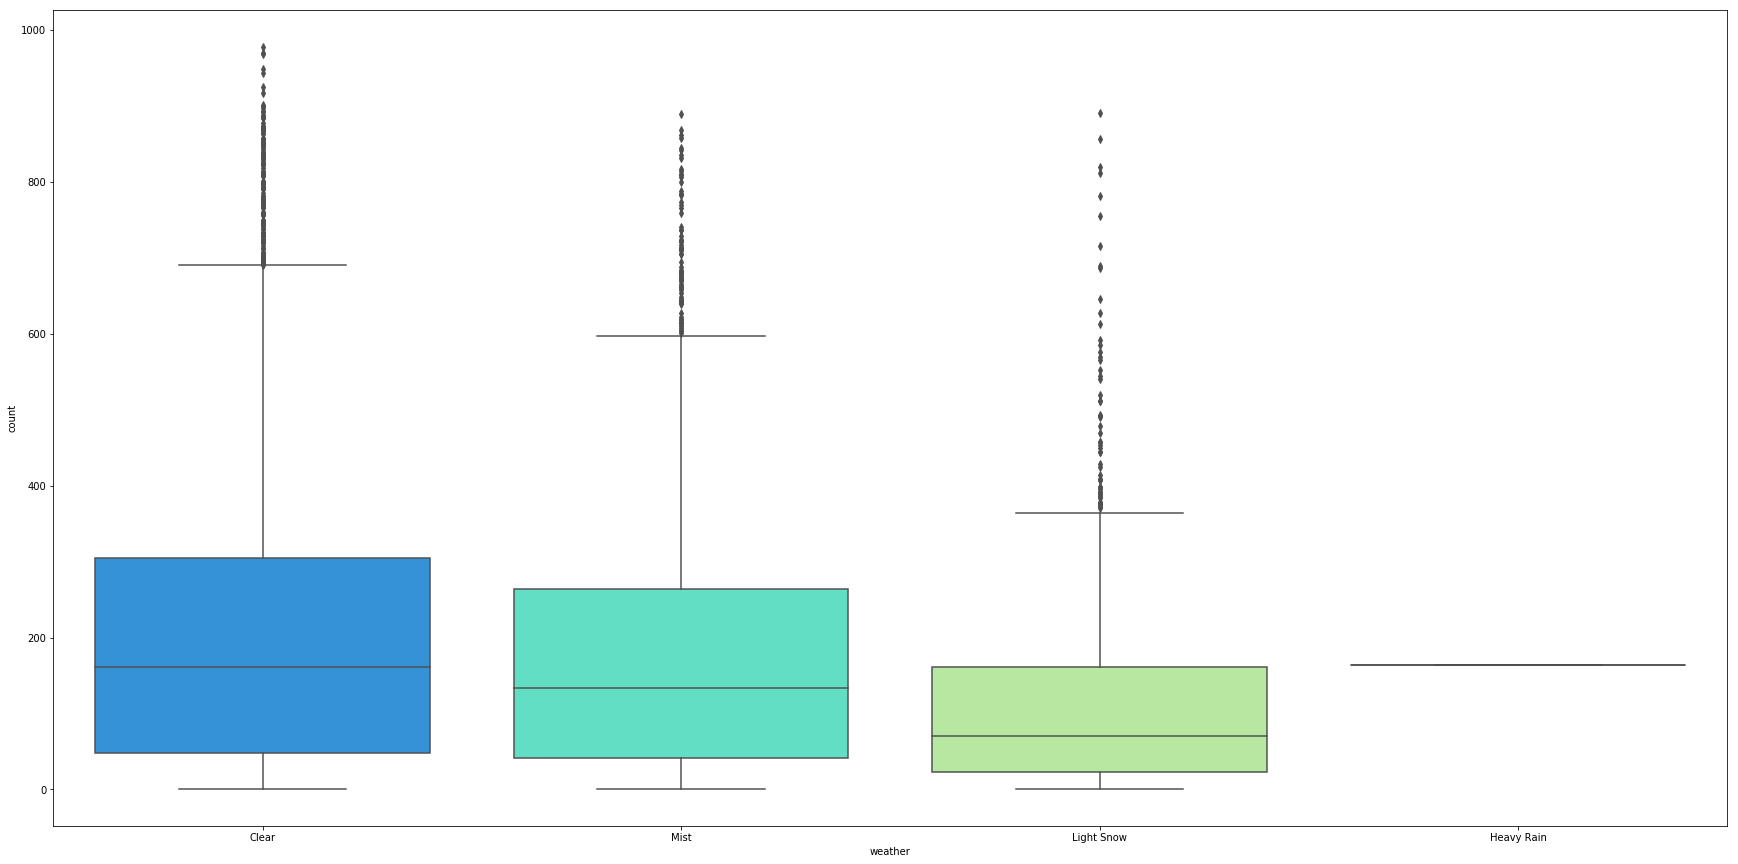

In [39]:
plt.figure(figsize=(30,15))
sns.boxplot('weather', 'count',data=df,palette='rainbow')

*There is an observation with Heavy Rain as a Weather*

In [40]:
df[df['weather'] == 'Heavy Rain']

datetime  season  holiday  workingday     weather  temp  \
5631 2012-01-09 18:00:00  Spring        0           1  Heavy Rain   8.2   

       atemp  humidity  windspeed  count  year  month  quarter  \
5631  11.365        86     6.0032    164  2012      1        1   

      weekNumberInYear dayInWeek  hourOfDay  
5631                 2    Monday         18

In [53]:
df_test[df_test['weather'] == 4]

datetime  season  holiday  workingday  weather  temp  atemp  \
154   2011-01-26 16:00:00       1        0           1        4  9.02   9.85   
3248  2012-01-21 01:00:00       1        0           0        4  5.74   6.82   

      humidity  windspeed  
154         93    22.0028  
3248        86    12.9980

*There is only one datapoint with Heavy Rain in the entire Training Dataset and two in the testing data*  

## Windspeed

C:\Users\Anuja\Anaconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



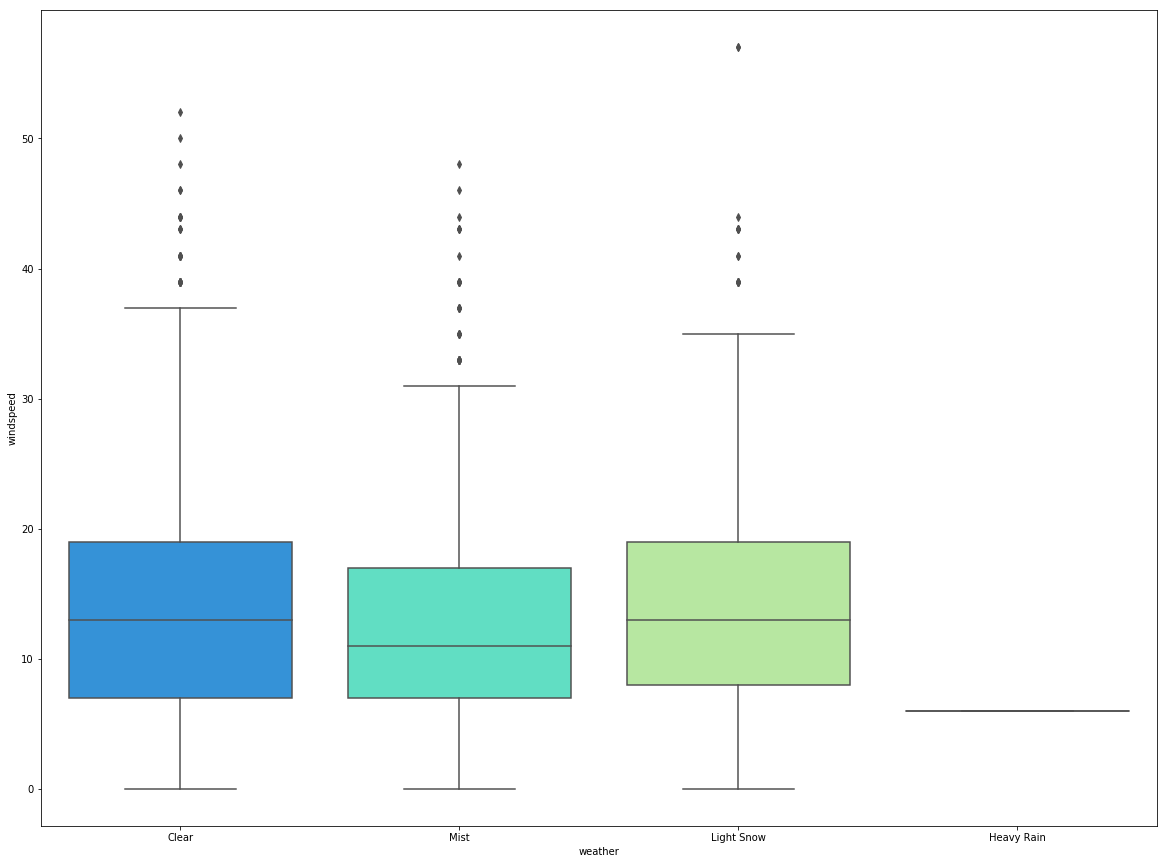

In [59]:
plt.figure(figsize=(20,15))
sns.boxplot( 'weather','windspeed',data=df,palette='rainbow')

*The mean windspeed was lowest for the Mist Weather*  
*An outlier can be seen which is above 50*  

In [43]:
df[df['windspeed'] > 50]

datetime  season  holiday  workingday     weather   temp  \
760  2011-02-15 01:00:00  Spring        0           1       Clear  12.30   
868  2011-02-19 15:00:00  Spring        0           0       Clear  18.04   
2755 2011-07-03 17:00:00    Fall        0           0  Light Snow  32.80   
2756 2011-07-03 18:00:00    Fall        0           0  Light Snow  32.80   

      atemp  humidity  windspeed  count  year  month  quarter  \
760   12.12        42    51.9987      5  2011      2        1   
868   21.97        16    50.0021    171  2011      2        1   
2755  37.12        49    56.9969    358  2011      7        3   
2756  37.12        49    56.9969    181  2011      7        3   

      weekNumberInYear dayInWeek  hourOfDay  
760                  7   Tuesday          1  
868                  7  Saturday         15  
2755                26    Sunday         17  
2756                26    Sunday         18

*Only 4 datapoints are present in the training dataset*  

C:\Users\Anuja\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



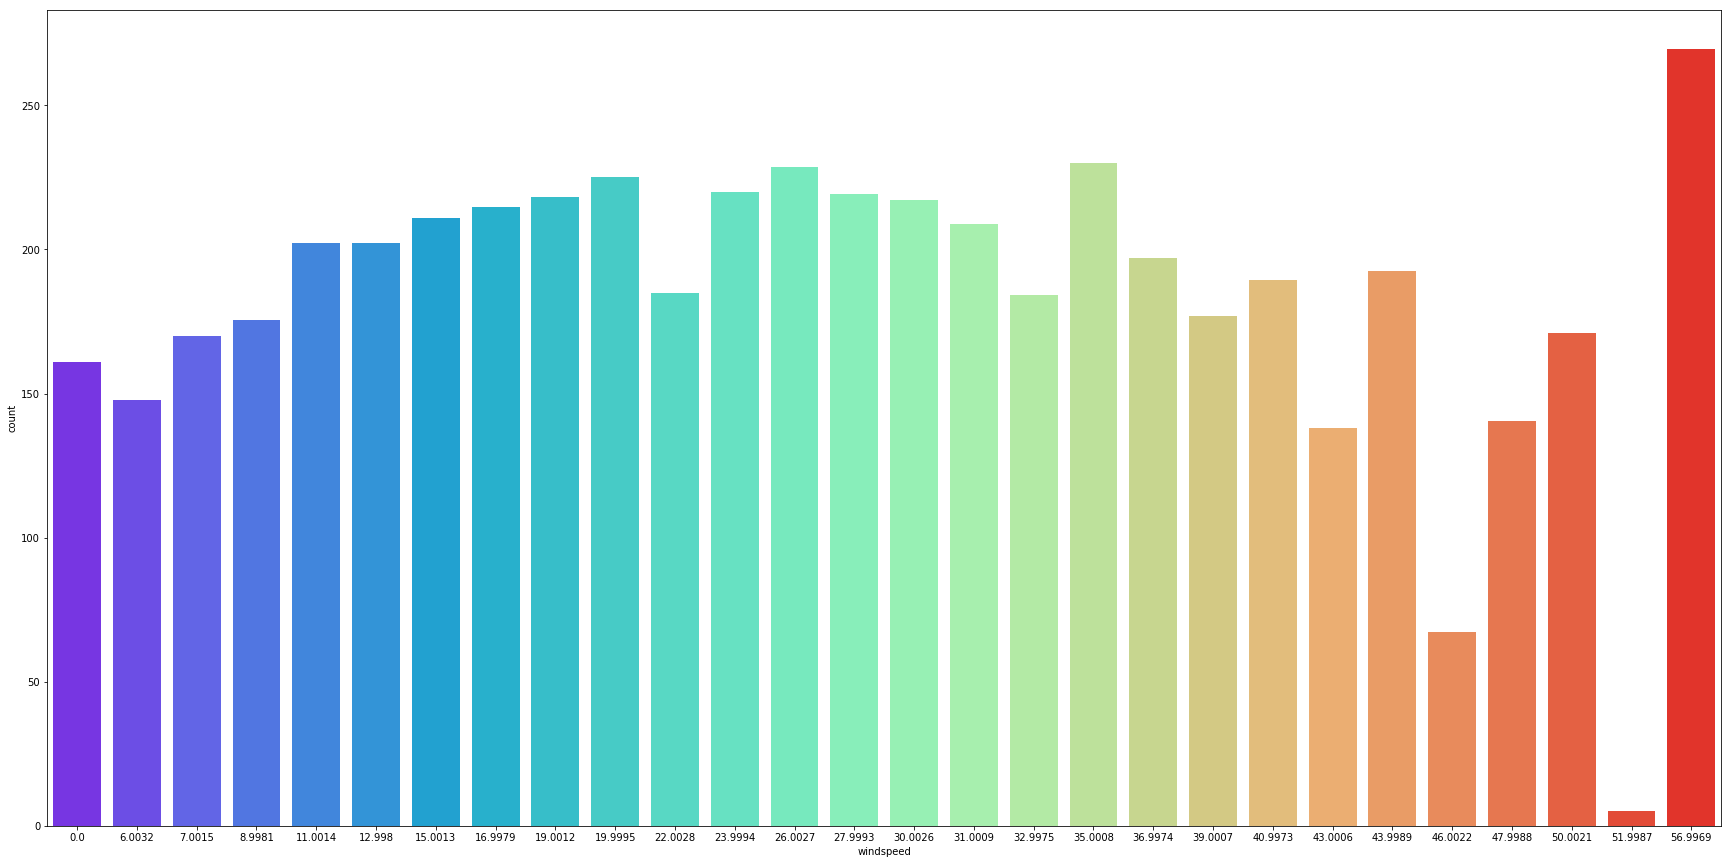

In [44]:
plt.figure(figsize=(30,15))
sns.barplot('windspeed', 'count',data=df,palette='rainbow', ci=None)

*Even though the windspeed was highest bikes were been rented*

## Windspeed with repect to Season, Month and Hour

In [45]:
df.groupby('season').mean()['windspeed'].iplot(
    yTitle='Bike Rentals',
    xTitle='Season',
    title='Season Wise Maximum Bike Rentals',
    colors='Red',
    mode='lines+markers')

df.groupby('month').mean()['windspeed'].iplot(
    yTitle='Bike Rentals',
    xTitle='Month',
    title='Month Wise Maximum Bike Rental',
    colors='Red',
    mode='lines+markers')

df.groupby('hourOfDay').mean()['windspeed'].iplot(
    yTitle='Bike Rentals',
    xTitle='Hour',
    title='Hour Wise Maximum Bike Rental',
    colors='Red',
    mode='lines+markers')

*The mean windspeed inncreased with hour but decreased with month*  

## Relation of Windspeed  and Humidity

In [46]:
df.groupby('hourOfDay').mean()[['windspeed','humidity']].iplot(
    yTitle='Bike Rentals',
    xTitle='Hour',
    title='Hour Wise Maximum Bike Rental',
    mode='lines+markers')

*Humidity and windspeed are negatively correlated*

## Season wise distribution of Bike Rentals, Temperature, Humidity and Windspeed

C:\Users\Anuja\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



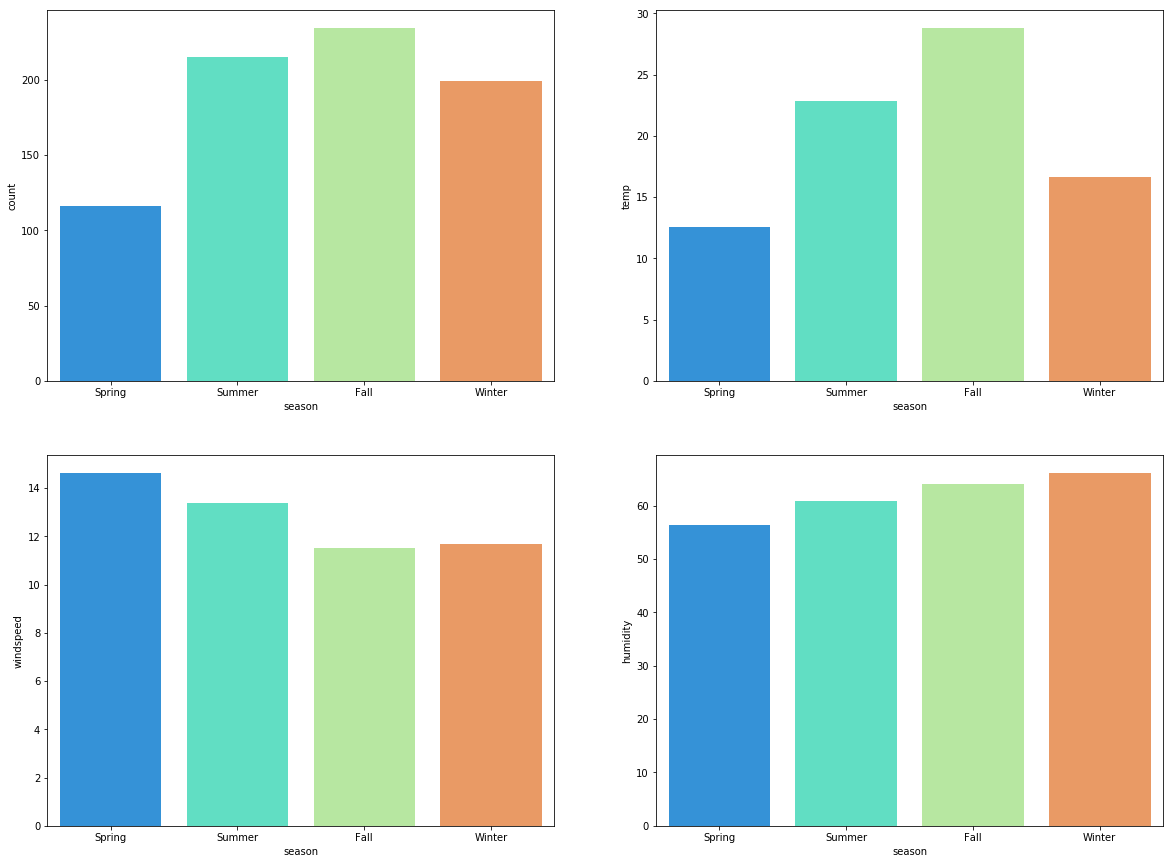

In [47]:
fig,axes = plt.subplots(ncols=2,nrows=2)
fig.set_size_inches(20, 15)
sns.barplot('season', 'count',data=df,palette='rainbow', ci=None,ax=axes[0][0])
sns.barplot('season', 'temp',data=df,palette='rainbow', ci=None, ax=axes[0][1])
sns.barplot('season', 'windspeed',data=df,palette='rainbow', ci=None,ax=axes[1][0])
sns.barplot('season', 'humidity',data=df,palette='rainbow', ci=None,ax=axes[1][1])

*Windspeed is negatively correlated with the count, temperature and Humidity season wise*

## Hourly distribution of Bike Rentals, Temperature, Humidity and Windspeed

C:\Users\Anuja\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



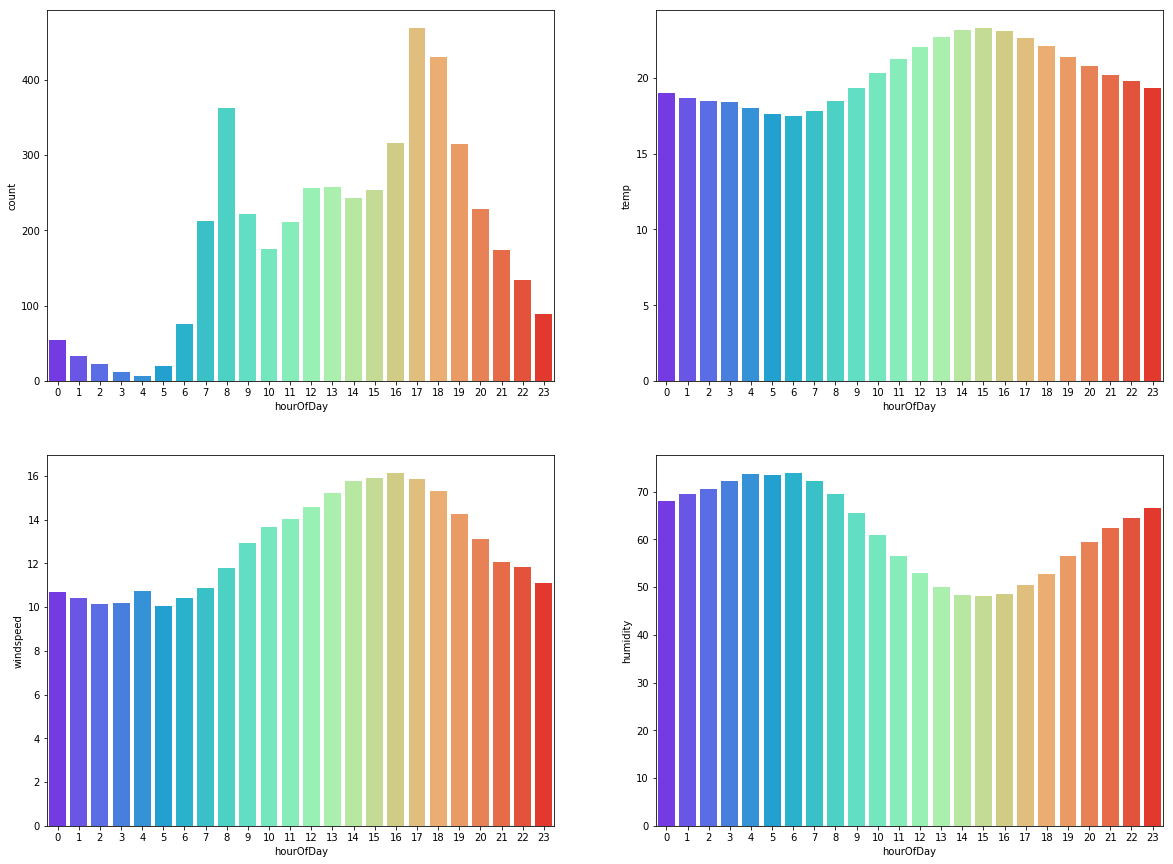

In [48]:
fig,axes = plt.subplots(ncols=2,nrows=2)
fig.set_size_inches(20, 15)
sns.barplot('hourOfDay', 'count',data=df,palette='rainbow', ci=None,ax=axes[0][0])
sns.barplot('hourOfDay', 'temp',data=df,palette='rainbow', ci=None, ax=axes[0][1])
sns.barplot('hourOfDay', 'windspeed',data=df,palette='rainbow', ci=None,ax=axes[1][0])
sns.barplot('hourOfDay', 'humidity',data=df,palette='rainbow', ci=None,ax=axes[1][1])

*Bike rental does not have major impact for the period 8am and 5pm to 6pm*

In [50]:
df.groupby('hourOfDay').mean()[['windspeed','humidity','temp','count']].iplot(
    yTitle='Bike Rentals',
    xTitle='Hour',
    title='Hour Wise Maximum Bike Rental',
    mode='lines+markers')

*Bike rental does not have major impact for the period 8am and 5pm to 6pm*  
*466 was the mean count for an average temperature of 22 degree Clecius, 50 humidity , and 15 windseed at 5pm*  

In [51]:
df.groupby('weekNumberInYear').mean()[['windspeed','humidity','temp','count']].iplot(
    yTitle='Bike Rentals',
    xTitle='Hour',
    title='Hour Wise Maximum Bike Rental',
    mode='lines+markers')

*There is a sudden decrease for count in the 52nd week may be because of Christmas vacation*  

In [ ]:
df_test.groupby('weekNumberInYear').mean()[['windspeed','humidity','temp','count']].iplot(
    yTitle='Bike Rentals',
    xTitle='Hour',
    title='Hour Wise Maximum Bike Rental',
    mode='lines+markers')

## Holiday and WorkingDay Analysis

C:\Users\Anuja\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



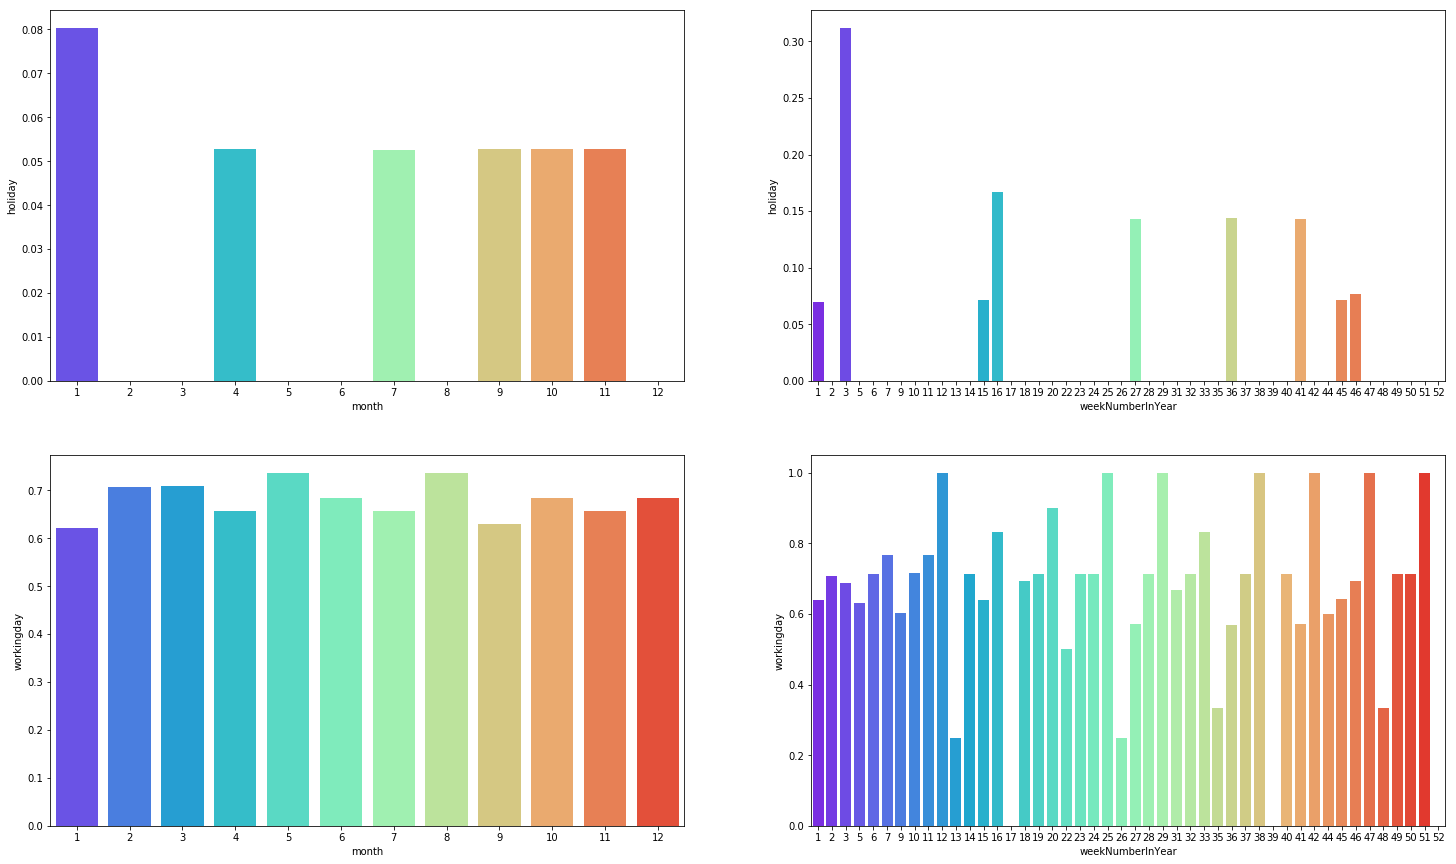

In [58]:
fig,axes = plt.subplots(ncols=2,nrows=2)
fig.set_size_inches(25,15)
sns.barplot('month','holiday',data=df,palette='rainbow', ci=None,ax=axes[0][0])
sns.barplot('weekNumberInYear', 'holiday',data=df,palette='rainbow', ci=None, ax=axes[0][1])
sns.barplot('month', 'workingday',data=df,palette='rainbow', ci=None,ax=axes[1][0])
sns.barplot('weekNumberInYear', 'workingday',data=df,palette='rainbow', ci=None,ax=axes[1][1])

*Since the trainig data set contains data till 20th, it is improper to take out any inferences*  
*Although the working day is evenly distributed*  